### Import all necessary modules

In [1]:
# Import data analysis modules
import numpy as np
import pandas as pd

# Import visualization modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the data into a dataframe using pandas

In [2]:
#Load dataset in with pandas
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory Analysis
It is always beneficial to get to know your data before jumping too far into analysis.It has been stated many times before, using the .info() and .describe() methods are great tools to quickly get a feel for your data. 

**Column Definitions**

|Column Name|Data type|Description|
|-----------|---------|-----------|
|PassengerID|Continuous|A unique identifier of the passengers.|
|Pclass|Categorical|Passenger class. 1 is the highest class, 3 is the lowest class.|
|Name|String|Name of passenger.|
|Sex|Categorical|Sex of passenger.|
|Age|Continuous|Age of passenger.|
|SibSp|Continuous|Total number of siblings and spouse.|
|Parch|Continuous|Total number of parents and children.|
|Ticket|String|Ticket ID of passenger.|
|Fare|Continuous|Price of ticket paid by passenger.|
|Cabin|String|Location of cabin.|
|Embarked|Categorical|Port where passenger came from. (C = Cherbourg, Q = Queenstown, S = Southampton)|

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Data Analysis
# Use the .isnull() method to locate missing data
missing_values = train.isnull()
missing_values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


We use seaborn to conduct heatmap to identify missing data, via the isnull() method on the dataset. The yellow dashes suggest the data is missing.

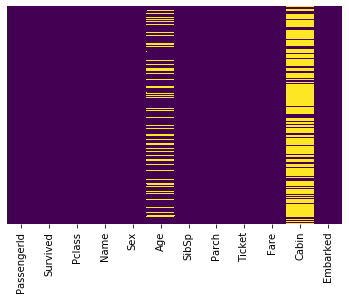

In [6]:
# Use seaborn to conduct heatmap to identify missing data
# data -> argument refers to the data to creat heatmap
# yticklabels -> argument avoids plotting the column names
# cbar -> argument identifies if a colorbar is required or not
# cmap -> argument identifies the color of the heatmap
sns.heatmap(data = missing_values, yticklabels=False, cbar=False, cmap='viridis')

When reviewing the dataset, it is helpful to use a .countplot() on the target label to get a quick reference of the ratios. Then we can begin assessing relationships with the target label and the various features in the dataset. The value of 0 are individuals who did not survive.

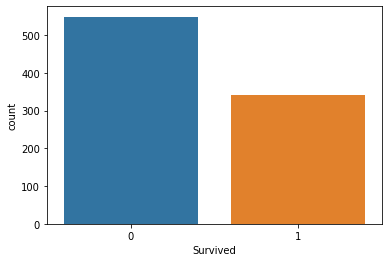

In [7]:
# Use the countplot() method to identify ratio of who survived vs. not
# (Tip) very helpful to get a visualization of the target label
# x -> argument referes to column of interest
# data -> argument refers to dataset
sns.countplot(x='Survived', data=train)

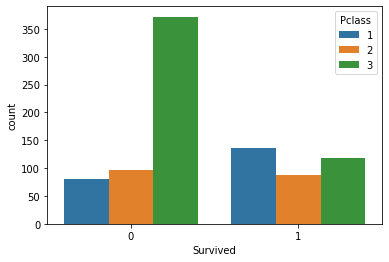

In [8]:
# Use the countplot() method to identify ratio of who survived vs. not with interest in Passenger class
# x -> argument referes to column of interest
# data -> argument refers to dataset
# hue -> allows another level to subdivide data
sns.countplot(x='Survived', data=train, hue='Pclass')

## Cleaning Data: (Most of the time is spent here*)

### Step 1 : Assess missing values to impute
There are times when data is missing, but we can impute (i.e. fill in) the values based on the existing content available. To investigate this concept we will use the .boxplot() on the ‘Pclass’ and ‘Age’ features to identify the average age per passenger class level.

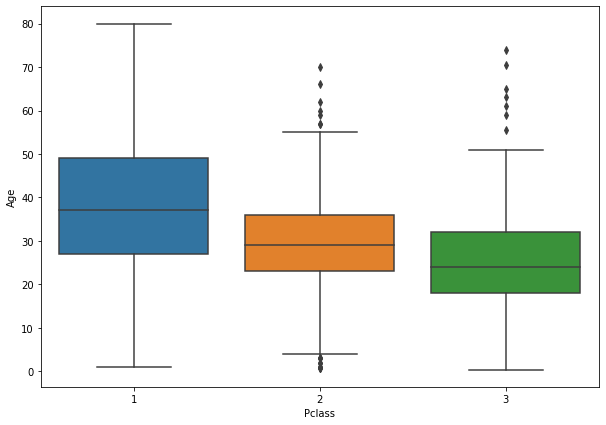

In [9]:
#Identify outliers in the data with the boxplot 
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y= 'Age',data = train)

### Step 2: Create function to update missing values
Defining a function using if statements allows for us to iterate over the data and update cells that contain missing values. Upon completion we are able to use the .heatmap() method to visualize our efforts to clean up the information.

In [10]:
# Create function to impute the age value if it is null
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
    
# Apply function to impute the age for missing values
# The age column is at position 0
# The pclass column is at position 1
# axis -> argument refers to columns instead of rows to apply the impute_age function
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

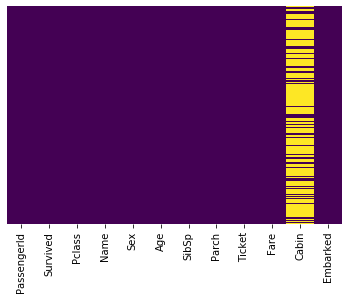

In [11]:
sns.heatmap(train.isnull(),yticklabels =False ,cbar= False ,cmap = 'viridis')

### Step 3: Drop features that are missing too much information or insignificant rows

In [12]:
train.drop('Cabin',axis = 1,inplace =True)

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Step 4: Convert Categorical features with Dummy variables
(Critical) -> Ensure avoidance of multicollinearity issue by passing in the argument ‘drop_first’. This issue may undermine the statistical significance of an independent variable.

In [14]:
# Use the .get_dummies() method to convert categorical data into dummy values
# get_dummies is similar to one-hot encoder 
# drop_first : drop the first column, the reason since we can infer the first one from the other columns, therefore it is not quite relevant and it is not addiing further information. this would prevent overfitting. 
# convert the text to number and then drop the text. 
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

# Use  .concat() method to merge the series data into one dataframe
train = pd.concat([train, sex, embark], axis=1)

In [16]:
import pickle
pickle.dump(pd.get_dummies, open("Titanic_get_dummies.pkl","wb"))


### Step 5: Drop any further insignificant features from the dataset

In [20]:
# Drop columns with categorical data, and also other irrelevant categories

train.drop(['Sex','Embarked','Ticket','Name','PassengerId'], axis=1, inplace=True)

## Training the Logistic Regression Model:

In [21]:
# Split data into 'X' features and 'y' target label sets
# similar to linear regression x and y. 
X = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]
y = train['Survived']
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [22]:
# Import module to split dataset
from sklearn.model_selection import train_test_split

# Split data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
# Import module for fitting
from sklearn.linear_model import LogisticRegression

# Create instance (i.e. object) of LogisticRegression,  check with documentation if you need to initialize any parameters.
logmodel = LogisticRegression()

# Fit the model using the training data
# X_train -> parameter supplies the data features
# y_train -> parameter supplies the target labels

# call .fit only on training dataset NOT test set, it can only learn parameters on training set  
logmodel.fit(X_train, y_train)
print(logmodel.coef_)
print(logmodel.intercept_)

[[-0.72321646 -0.02483126 -0.26911232 -0.09306772  0.00793259 -2.44825055
   0.04330686 -0.23079552]]
[3.3517415]


/anaconda3/envs/FTDS/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
#Predicting the target for test data
predictions = logmodel.predict(X_test)

In [25]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

### Evaluation

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.78      0.65      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



<img src="precision-recall-etc.png" />

Source: https://scikit-learn.org/0.20/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support

In [28]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(tn, fp, fn, tp)
print([tp,fp])
print([fn,tn])

133 21 40 74
[74, 21]
[40, 133]


In [29]:
import pickle
pickle.dump(logmodel, open("Titanic_Deployment.pkl","wb"))


<img src="confusion-matrix-2.png" />

Source: https://en.wikipedia.org/wiki/Confusion_matrix